In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def draw(x1, x2):
    ln = plt.plot(x1, x2)
    
def sigmoid(score):
    return 1 / (1 + np.exp(-score))

In [37]:
n_pts = 100
np.random.seed(0)
bias = np.ones(n_pts)
random_x1_top_values = np.random.normal(10, 2, n_pts)
random_x2_top_values = np.random.normal(12, 2, n_pts)
top_region = np.array([random_x1_top_values, random_x2_top_values, bias]).T
random_x1_botton_values = np.random.normal(5, 2, n_pts)
random_x2_botton_values = np.random.normal(6, 2, n_pts)
bottom_region = np.array([random_x1_botton_values, random_x2_botton_values, bias]).T
all_points = np.vstack((top_region, bottom_region))
# initialize weights and bias
w1 = -0.2
w2 = -0.35
b = 3.5
line_parameters = np.matrix([w1, w2, b]).T
x1 = np.array([bottom_region[:, 0].min(), top_region[:, 0].max()])
x2 = -b/w2 + x1 * (-w1 / w2)   # w1x1 + w2x2 + b = 0
print(x1, x2)


[-0.54518551 14.53950925] [10.31153458  1.691709  ]


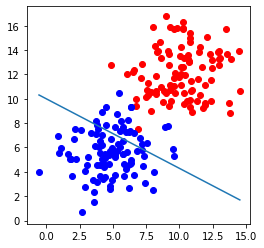

In [38]:
_, ax = plt.subplots(figsize=(4, 4))
ax.scatter(top_region[:, 0], top_region[:, 1], color='r')
ax.scatter(bottom_region[:, 0], bottom_region[:, 1], color='b')
draw(x1, x2)
plt.show()

In [39]:
linear_combinations = all_points * line_parameters
probabilities = sigmoid(linear_combinations)

Use cross entropy to calculate the classification error

In [41]:
def calculate_error(line_parameters, points, y):
    m = points.shape[0]
    p = sigmoid(all_points * line_parameters)
    cross_entropy = -(1/m) * (np.log(p).T * y + np.log(1-p).T * (1-y))
    return cross_entropy

In [43]:
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)
print(calculate_error(line_parameters, all_points, y))

[[0.30139461]]


In [48]:
def gradient_descent(line_parameters, points, y, alpha):
    m = points.shape[0]
    for i in range(2000):
        p = sigmoid(points * line_parameters)
        gradient = (points.T * (p - y)) * (alpha/m)
        line_parameters = line_parameters - gradient
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)
        x1 = np.array([points[:, 0].min(), points[:, 0].max()])
        x2 = -b/w2 + x1 * (-w1 / w2)   # w1x1 + w2x2 + b = 0
    draw(x1, x2)

In [49]:
#set w1, w2, bias to 0
line_parameters = np.matrix([np.zeros(3)]).T

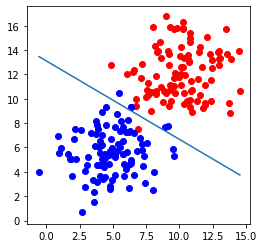

In [50]:
_, ax = plt.subplots(figsize=(4, 4))
ax.scatter(top_region[:, 0], top_region[:, 1], color='r')
ax.scatter(bottom_region[:, 0], bottom_region[:, 1], color='b')
gradient_descent(line_parameters, all_points, y, 0.06)
plt.show()